In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format


In [ ]:
import scipy.stats as stats
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train (1).csv")
# Print the first rows of the pandas DataFrame.


In [ ]:
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [ ]:
from pandas.core.reshape.reshape import get_dummies
for col in list(train_df):
  if train_df[col].dtypes == 'object':
    test_df = pd.get_dummies(test_df, columns=[col])
    train_df = pd.get_dummies(train_df, columns=[col])

In [ ]:
list(train_df)

In [ ]:
import statistics
from statistics import mean

Find unique correlation by feature

In [ ]:
price = []
aveprice = []
feat = []
def find_unique_cor(feature):
  for uni in train_df[feature].unique():
    feat.append(uni)
    for index in train_df['Id']:
      if train_df[feature][index - 1] == uni:
        price.append(train_df['SalePrice'][index - 1])
    aveprice.append(statistics.mean(price))
    price.clear()
  return price, aveprice, feat

In [ ]:
find_unique_cor('Neighborhood')
len(feat), len(aveprice)

(25, 25)

In [ ]:
feature_explorer = pd.DataFrame({'feat':feat, 'aveprice':aveprice})
feature_explorer

,feat,aveprice
0,CollgCr,197965
1,Veenker,238772
2,Crawfor,210624
3,NoRidge,335295
4,Mitchel,156270
...,...,...
20,NPkVill,142694
21,Blmngtn,194870
22,BrDale,104493
23,SWISU,142591


Place neighborhoods into three buckets manually

In [ ]:
def map_neighborhood(feature_explorer):
  map_neighbor = {}
  i=0
  for index in feature_explorer['feat']:
      if feature_explorer['aveprice'][i] < 175000:
        map_neighbor[index] = 1
      elif feature_explorer['aveprice'][i] > 175000 and feature_explorer['aveprice'][i] < 270000:
        map_neighbor[index] = 2 
      elif feature_explorer['aveprice'][i] > 270000:
        map_neighbor[index] = 3 
      i+=1   
  return map_neighbor   

In [ ]:
feature_explorer

,feat,aveprice
0,CollgCr,197965
1,Veenker,238772
2,Crawfor,210624
3,NoRidge,335295
4,Mitchel,156270
...,...,...
20,NPkVill,142694
21,Blmngtn,194870
22,BrDale,104493
23,SWISU,142591


In [ ]:
map_neighbor = map_neighborhood(feature_explorer)
map_neighbor

{'CollgCr': 2,
 'Veenker': 2,
 'Crawfor': 2,
 'NoRidge': 3,
 'Mitchel': 1,
 'Somerst': 2,
 'NWAmes': 2,
 'OldTown': 1,
 'BrkSide': 1,
 'Sawyer': 1,
 'NridgHt': 3,
 'NAmes': 1,
 'SawyerW': 2,
 'IDOTRR': 1,
 'MeadowV': 1,
 'Edwards': 1,
 'Timber': 2,
 'Gilbert': 2,
 'StoneBr': 3,
 'ClearCr': 2,
 'NPkVill': 1,
 'Blmngtn': 2,
 'BrDale': 1,
 'SWISU': 1,
 'Blueste': 1}

In [ ]:
map_neighbor['NWAmes']

2

In [ ]:


train_df[0:1,('Neighborhood')]

In [ ]:
def reval_Neighborhood(feature_explorer):
  i=0
  for hood in train_df['Neighborhood']:
    train_df.loc[i:i+1,('Neighborhood')] = map_neighbor[hood]
    i+=1
  i=0  
  for hood in test_df['Neighborhood']:
    test_df.loc[i:i+1,('Neighborhood')] = map_neighbor[hood]
    i+=1    


In [ ]:
reval_Neighborhood(feature_explorer)
train_df['Neighborhood']

In [ ]:
train_df.Neighborhood[0:50]

In [ ]:
def feature_explore(feature1, saleprice):
  plt.figure()
  plt.ylabel('feature1')
  plt.xlabel('saleprice')

  plt.scatter(saleprice,feature1)
  #plt.scatter(saleprice, feature2)
  #plt.plot(saleprice, feature1, label="feature1")
  #plt.plot(saleprice, feature2, label="feature2")
  plt.legend()
  '''
  highest_loss = max(feature1)
  lowest_loss = min(feature1)
  delta = highest_loss - lowest_loss
  y_top = highest_loss + (delta * 0.05)
  y_bottom = lowest_loss - (delta * 0.05)
  plt.ylim(y_bottom, y_top)
  '''
  plt.show()  

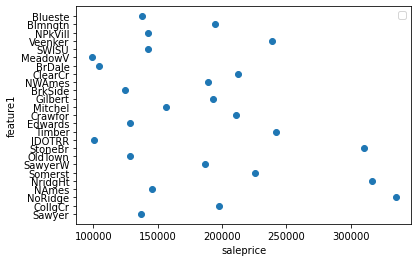

In [ ]:
feature_explore(feature_explorer['feat'], 
                feature_explorer['aveprice'])

Manually convert string features into buckets

In [ ]:
#Condition1
codemaps = {'Condition1_codemap' : {
    'RRNn': 3,
    'RRAe': 1,
    'RRNe': 2,
    'PosA': 3,
    'PosN': 3,
    'Feedr': 1,
    'RRAn': 2,
    'Norm': 2,
    'Artery': 1,
    2: 2,
    1: 2,
    3: 2
},

'ExterCond_codemap' : {
    'TA' : 2,
    'Gd' : 2,
    'Fa' : 1,
    'Ex' : 2,
    'Po' : 1,
     2: 2,
    1: 2,
    3: 2
},

'ExterQual_codemap' : {
    'TA' : 2,
    'Gd' : 3,
    'Fa' : 1,
    'Ex' : 4,
     2: 2,
    1: 2,
    3: 2,
    4: 2 
}
}

feature = ['Condition1', 'ExterCond','ExterQual','Neighborhood']

def neighborhood():
  train_df['Neighborhood'].loc[(train_df['SalePrice'] > 270000)] = 3
  train_df['Neighborhood'].loc[(train_df['SalePrice'].between(175000, 270000))] = 2
  train_df['Neighborhood'].loc[(train_df['SalePrice'] < 175000)] = 1

  test_df['Neighborhood'].loc[(test_df['SalePrice'] > 270000)] = 3
  test_df['Neighborhood'].loc[(test_df['SalePrice'].between(175000, 270000))] = 2
  test_df['Neighborhood'].loc[(test_df['SalePrice'] < 175000)] = 1

In [ ]:
neighborhood()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
test_df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'BrDale', 'NPkVill', 'NridgHt',
       'Blmngtn', 'NoRidge', 'Somerst', 'SawyerW', 'Sawyer', 'NWAmes',
       'OldTown', 'BrkSide', 'ClearCr', 'SWISU', 'Edwards', 'CollgCr',
       'Crawfor', 'Blueste', 'IDOTRR', 'Mitchel', 'Timber', 'MeadowV',
       'Veenker'], dtype=object)

Engineer features

In [ ]:

def feat_lin_engineer(feature, codemap):
  index = 0
  for feat in train_df[feature]:
    train_df[feature][index] = codemap[feat]
    test_df[feature][index] = codemap[feat]
    index+=1
 

In [ ]:
for feat in codemaps:
  print(feat)

Condition1_codemap
ExterCond_codemap
ExterQual_codemap


Call feature engineer loop and convert to float dtype

In [ ]:
neighborhood()
def engineer_all(train_df, test_df):
  i=0
  for feat in codemaps:
    feat_lin_engineer(feature[i], codemaps[feat])
    train_df = train_df.astype({feature[i]:'float'}, copy=False)
    test_df = test_df.astype({feature[i]:'float'}, copy=False)
    np.dtype(train_df[feature[i]])
    i+=1

In [ ]:
engineer_all(train_df, test_df)

In [ ]:
train_df['ExterCond'][20:30]

944     2
657     2
40      2
832     2
290     2
1020    2
1187    2
186     2
89      2
320     2
Name: ExterCond, dtype: object

In [ ]:
train_df = train_df.astype({'ExterQual':'float'}, copy=False)
np.dtype(train_df['ExterQual'])

dtype('float64')

In [ ]:
#from sklearn.model_selection import train_test_split
#train_df, train_df['SalePrice'], test_df, test_df['SalePrice'] = train_test_split(train_df,train_df['SalePrice'],test_size=0.2,train_size=0.8)

Normalize data

In [ ]:
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Calculate the Z-scores of each column in the test set.
test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


In [ ]:
train_df_norm['SalePrice']
#test_df['Exterior1st_VinylSd']

621     0.7
454     0.1
866     0.9
209    -0.5
902    -0.0
       ... 
388     0.1
103     0.2
38     -0.9
865    -0.4
1125   -0.8
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
print('test_df_mean= ')
print(train_df_mean['SalePrice'])
print('test_df_std= ')
print(train_df_std['SalePrice'])
compareDF = pd.DataFrame({'real':train_df['SalePrice'], 'normalized':train_df_norm['SalePrice']})
compareDF['SalePrice'] = compareDF['normalized']
compareDF['SalePrice'] = compareDF['SalePrice'] * 79442.50288288662  + 180921.19589041095

compareDF
#FullBath HalfBath LotArea OverallCond SaleCondition SaleType 1stFlrSF 2ndFlrSF YrSold YearBuilt GarageCars BsmtFinSF1 BsmtFinSF2

In [ ]:
features = ['Condition1', 'FullBath', 'HalfBath', 'LotArea', 'OverallCond', 'Neighborhood', 'ExterCond','ExterQual', '1stFlrSF', '2ndFlrSF', 'YrSold', 'YearBuilt', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2']

In [ ]:
train_df['synthetic'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1']

In [ ]:
train_df['Id'][6]

7

In [ ]:
list(train_df_norm)

In [ ]:
features_sale = features + ['SalePrice']
features_sale

['Condition1',
 'FullBath',
 'HalfBath',
 'LotArea',
 'OverallCond',
 'Neighborhood',
 'ExterCond',
 'ExterQual',
 '1stFlrSF',
 '2ndFlrSF',
 'YrSold',
 'YearBuilt',
 'GarageCars',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'SalePrice']

In [ ]:
train_df_norm1 = train_df_norm[features_sale]
list(train_df_norm1)

['Condition1',
 'FullBath',
 'HalfBath',
 'LotArea',
 'OverallCond',
 'Neighborhood',
 'ExterCond',
 'ExterQual',
 '1stFlrSF',
 '2ndFlrSF',
 'YrSold',
 'YearBuilt',
 'GarageCars',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'SalePrice']

In [ ]:
feature_columns = []

for feat in features:
  feat = tf.feature_column.numeric_column(feat)
  feature_columns.append(feat)



# Convert the list of feature columns into a layer that will later be fed into
# the model. 
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

def plot_loss(epochs, loss):
  plt.figure()
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

  plt.plot(epochs[1:], loss[1:], label="loss")
  plt.legend()
  
  highest_loss = max(loss[1:])
  lowest_loss = min(loss[1:])
  delta = highest_loss - lowest_loss
  y_top = highest_loss + (delta * 0.05)
  y_bottom = lowest_loss - (delta * 0.05)
  plt.ylim(y_bottom, y_top)
  plt.show()  

In [ ]:
#SIMPLE LINEAR REGRESSION MODEL

In [ ]:
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model  


def train_model(model, dataset, epochs, batch_size, label_name, my_validation_split = 0.2):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, validation_split = my_validation_split, shuffle=True)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]

  return epochs, rmse, history.history 

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


1/6 [====>.........................] - ETA: 2s - loss: 2.6569 - mean_squared_error: 2.6569

6/6 [==============================] - 1s 48ms/step - loss: 2.9571 - mean_squared_error: 2.9571 - val_loss: 3.0286 - val_mean_squared_error: 3.0286
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 2.5685 - mean_squared_error: 2.5685 - val_loss: 2.7128 - val_mean_squared_error: 2.7128
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 2.3071 - mean_squared_error: 2.3071 - val_loss: 2.4538 - val_mean_squared_error: 2.4538
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 2.0848 - mean_squared_error: 2.0848 - val_loss: 2.2263 - val_mean_squared_error: 2.2263
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 1.8911 - mean_squared_error: 1.8911 - val_loss: 2.0270 - val_mean_squared_error: 2.0270
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 1.7165 - mean_squared_error: 1.7165 - val_loss: 1.8455 - val_mean_squared_error: 1.8455
Epoch 7/50
6/6 [==============================] - 0s 7ms/step 

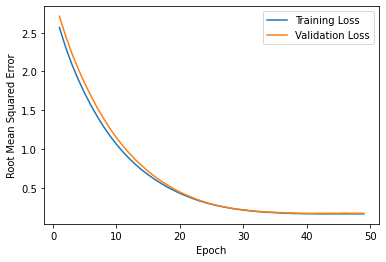

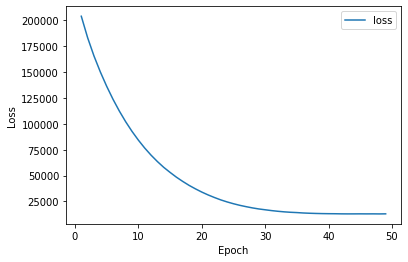

'\ntest_label = np.array(test_features.pop(label_name)) # isolate the label\nprint("\n Evaluate the linear regression model against the test set:")\nmy_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)\n'

In [ ]:
learning_rate = 0.003
epochs = 50
batch_size = 200
label_name = "SalePrice"
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse, history = train_model(my_model, train_df_norm1, epochs, batch_size, label_name)
print(history)
plot_the_loss_curve(epochs, history["loss"], 
                    history["val_loss"])

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
loss = [i  * int(79442) for i in history['loss']]
plot_loss(epochs, loss)

'''
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)
'''

In [ ]:
loss = [i  * int(79442) for i in history['loss']]
loss

In [ ]:
train_df_norm = train_df_norm.sort_index(ascending=True)

In [ ]:
#TRAINING PREDICTIONS VS ACTUAL
testtrain_features = {name:np.array(value) for name, value in train_df_norm.items()}
predictions = my_model.predict(testtrain_features)
trainPredictDF = pd.DataFrame(predictions)

trainPredictDF['SalePrice'] = train_df['SalePrice']
trainPredictDF[0]

46/46 [==============================] - 1s 14ms/step


0       0.4
1       0.6
2       0.4
3      -0.1
4       1.7
       ... 
1455    0.1
1456    0.6
1457    0.8
1458   -0.7
1459   -0.4
Name: 0, Length: 1460, dtype: float32

In [ ]:
testtrain_features

Normalize prediction outputs to verify

In [ ]:
trainPredictDF.rename(columns={0:'predictions'}, inplace=True)
trainPredictDF['predictions'] = trainPredictDF['predictions'] * 79442 + 180921
trainPredictDF['delta'] = np.absolute(trainPredictDF['predictions'] - trainPredictDF['SalePrice'])

In [ ]:
trainPredictDF["delta"].mean()

20853.730326187033

In [ ]:
#trainPredictDF['predictions'] = trainPredictDF[0] * 79442 - 180921
#trainPredictDF['SalePrice'] = trainPredictDF['SalePrice']  * 79442 - 180921
trainPredictDF

,predictions,SalePrice,delta
0,210118.7,208500,1618.7
1,227026.2,181500,45526.2
2,211195.8,223500,12304.2
3,171101.0,140000,31101.0
4,314552.2,250000,64552.2
...,...,...,...
1455,184897.2,175000,9897.2
1456,230647.6,210000,20647.6
1457,244831.2,266500,21668.8
1458,126832.4,142125,15292.6


In [ ]:
0.3253  * 79442 - 180921

-155078.5174

In [ ]:
train_df_norm

In [ ]:
# re scale to real numbers   test_df_norm * test_df_std - test_df_mean = test_df
#test_df_mean = test_df.mean()
#test_df_std = test_df.std()
#test_df_norm = (test_df - test_df_mean)/test_df_std
#train_df['realhistory'] = history["loss"] * 79442 - 180921
predictions = my_model.predict(test_features)
predictDF = pd.DataFrame(predictions)
predictDF = predictDF * 79442 - 180921
predictDF

In [ ]:
#NEURAL NET PREDICTOR

In [ ]:
def create_model(my_learning_rate, my_feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer. We've specified the following arguments:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.

  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=3, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(l=0.04), 
                                  name='Hidden1'))
  
  # Define the second hidden layer with 12 nodes. 
  model.add(tf.keras.layers.Dense(units=3, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(l=0.04),
                                  name='Hidden2'))
  
  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

def train_model(model, dataset, epochs, label_name,  my_validation_split = 0.2,
                batch_size=None):
  """Train the model by feeding it data."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, validation_split = my_validation_split, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse, history.history  

Epoch 1/75


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/4 [======>.......................] - ETA: 1s - loss: 1.5454 - mean_squared_error: 1.2155

4/4 [==============================] - 1s 79ms/step - loss: 1.3679 - mean_squared_error: 1.0577 - val_loss: 0.9410 - val_mean_squared_error: 0.6598
Epoch 2/75
4/4 [==============================] - 0s 9ms/step - loss: 0.9253 - mean_squared_error: 0.6579 - val_loss: 0.7260 - val_mean_squared_error: 0.4806
Epoch 3/75
4/4 [==============================] - 0s 9ms/step - loss: 0.7055 - mean_squared_error: 0.4699 - val_loss: 0.5917 - val_mean_squared_error: 0.3703
Epoch 4/75
4/4 [==============================] - 0s 9ms/step - loss: 0.5714 - mean_squared_error: 0.3552 - val_loss: 0.5054 - val_mean_squared_error: 0.2967
Epoch 5/75
4/4 [==============================] - 0s 10ms/step - loss: 0.4888 - mean_squared_error: 0.2832 - val_loss: 0.4761 - val_mean_squared_error: 0.2765
Epoch 6/75
4/4 [==============================] - 0s 10ms/step - loss: 0.4366 - mean_squared_error: 0.2413 - val_loss: 0.4407 - val_mean_squared_error: 0.2539
Epoch 7/75
4/4 [==============================] - 0s 10ms/st

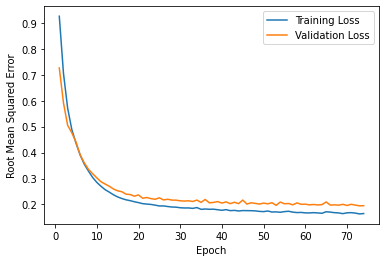

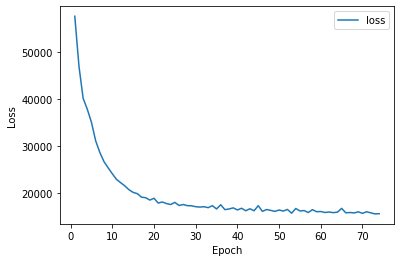


 Evaluate the new model against the test set:


In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.018
epochs = 75
batch_size = 300
my_validation_split = 0.2
# Specify the label
label_name = "SalePrice"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse, history = train_model(my_model, train_df_norm1, epochs, 
                          label_name, my_validation_split, batch_size)
plot_the_loss_curve(epochs, history["loss"], 
                    history["val_loss"])
loss = [i  * int(79442) for i in history['val_loss']]
plot_loss(epochs, loss)
# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = 'SalePrice' # isolate the label
print("\n Evaluate the new model against the test set:")
#my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

In [ ]:
train_df_norm = train_df_norm.sort_index(ascending=True)
train_df_norm['SalePrice']

0       0.3
1       0.0
2       0.5
3      -0.5
4       0.9
       ... 
1455   -0.1
1456    0.4
1457    1.1
1458   -0.5
1459   -0.4
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
loss = [i  * int(79442) for i in history['loss']]
loss

In [ ]:
#TRAINING PREDICTIONS VS ACTUAL
testtrain_features = {name:np.array(value) for name, value in test_df_norm.items()}
predictions = my_model.predict(testtrain_features)
trainPredictDF = pd.DataFrame(predictions)

trainPredictDF['SalePrice'] = train_df['SalePrice']
trainPredictDF[0]

46/46 [==============================] - 1s 13ms/step


0      -0.7
1      -0.2
2       0.3
3       0.3
4       0.2
       ... 
1454   -1.1
1455   -1.3
1456   -0.1
1457   -0.8
1458    0.6
Name: 0, Length: 1459, dtype: float32

In [ ]:
train_df_norm['SalePrice']

In [ ]:
trainPredictDF.rename(columns={0:'predictions'}, inplace=True)
trainPredictDF['predictions'] = (trainPredictDF['predictions'] * 79442) + 180921
trainPredictDF['SalePrice']

,predictions,SalePrice
0,126851.7,208500
1,165647.9,181500
2,207351.8,223500
3,204315.0,140000
4,193264.0,250000
...,...,...
1454,91284.8,185000
1455,80504.6,175000
1456,173702.5,210000
1457,114781.3,266500


In [ ]:
trainPredictDF = trainPredictDF.drop('SalePrice', axis=1)

In [ ]:
trainPredictDF.rename(columns={'predictions':'SalePrice'}, inplace=True)
trainPredictDF.rename(columns={index:'Id'}, inplace=True)

In [ ]:
trainPredictDF.index.name='Id'

In [ ]:
i = 0
for index in trainPredictDF['SalePrice']:
  trainPredictDF['Id'][i] = 1461 + i
  i+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
trainPredictDF['Id'] = trainPredictDF['Id'] + 1461

In [ ]:
trainPredictDF = trainPredictDF[['Id', 'SalePrice']]
trainPredictDF

,Id,SalePrice
Id,,
0,1461,126851.7
1,1462,165647.9
2,1463,207351.8
3,1464,204315.0
4,1465,193264.0
...,...,...
1454,2915,91284.8
1455,2916,80504.6
1456,2917,173702.5


In [ ]:
trainPredictDF['Id'] = trainPredictDF['Id'] + 1461

In [ ]:
trainPredictDF['delta'] = np.absolute(trainPredictDF['predictions'] - trainPredictDF['SalePrice'])
trainPredictDF["delta"].mean()

18128.77276330378

In [ ]:
#trainPredictDF['predictions'] = trainPredictDF[0] * 79442 - 180921
#trainPredictDF['SalePrice'] = trainPredictDF['SalePrice']  * 79442 - 180921
trainPredictDF

,predictions,SalePrice,delta
0,198842.9,208500,9657.1
1,185270.6,181500,3770.6
2,203058.3,223500,20441.7
3,152980.4,140000,12980.4
4,286585.6,250000,36585.6
...,...,...,...
1455,168994.7,175000,6005.3
1456,230397.1,210000,20397.1
1457,225734.7,266500,40765.3
1458,129222.2,142125,12902.8


In [ ]:
test_df_mean= 
180921.19589041095
test_df_std= 
79442.50288288662

-170180.4416

In [ ]:
0.1352 * 79442.50288288662

10740.62638976627

In [ ]:
test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean)/test_df_std
(test_df_norm + test_df_mean/test_df_std)test_df_std  = test_df

In [ ]:
#SKLEARN LINEAR REGRESSION MODEL

In [ ]:
y = train_df.SalePrice
X = train_df[features]
X.head()

,FullBath,HalfBath,LotArea,OverallCond,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,1stFlrSF,2ndFlrSF,YrSold,YearBuilt,GarageCars,BsmtFinSF1,BsmtFinSF2
457,1,0,53227,6,0,0,0,0,1,0,1663,0,2008,1954,2,1116,0
352,1,0,9084,6,0,0,0,0,1,0,616,495,2008,1941,1,236,380
1307,1,0,8072,5,0,0,0,0,1,0,990,0,2009,1994,2,746,0
409,2,1,10800,5,0,0,0,0,0,1,1050,1028,2008,2007,3,789,0
980,1,0,12122,9,0,0,0,0,1,0,999,0,2008,1961,2,867,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
amesModel = DecisionTreeRegressor(random_state=1)
amesModel.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
  predictions = amesModel.predict(X)
  print(predictions)
  #train_df['SalePrice']

[256000.  95000. 138000. ... 159895. 155000. 246578.]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
amesModel.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [ ]:
predic = amesModel.predict(val_X)

In [ ]:
print(predic)
y.head

[230500. 105000. 135000.  79000. 119750. 134450. 360000. 194500. 127000.
 170000. 295493. 179900. 130250. 161500. 193500. 392000. 129000. 423000.
 124000. 159000. 255000. 140000. 142000. 295493. 141000. 270000. 131000.
 226700. 271000. 240000. 254900. 277000. 128500. 115000. 157500.  82000.
 248000. 135000. 485000. 110000.  52500.  82500. 177000.  52500. 127000.
 178000. 137900. 188500. 394432. 105000. 180500. 180000. 262280. 106500.
 130500. 148000. 242000. 215000. 133000. 193000.  84500. 139600. 143500.
 128000. 140200. 156000. 225000.  87000. 171000. 210000. 193000.  87000.
 165000. 154000. 204000. 207500. 164000. 116500.  80000. 250000. 253000.
 279500. 161500. 274000. 133900. 185750. 134900. 133500. 259500. 172500.
 485000. 136000. 154300. 306000. 415298. 171500. 235000. 154000. 119750.
 178000.  87000. 200000. 134000. 335000. 142500. 137500. 191000. 325624.
 135500. 188700. 121500. 155000. 110000. 177000. 147000. 128000. 214000.
 120000. 177000. 111000. 215000. 118500.  97500. 11

<bound method NDFrame.head of 457     256000
352      95000
1307    138000
409     339750
980     178400
         ...  
632      82500
393     100000
982     159895
962     155000
1394    246578
Name: SalePrice, Length: 1460, dtype: int64>